In [2]:

import pandas as pd
import numpy as np

df= pd.read_csv('diabetes_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


## DATA PREPROCESSING


In [5]:
## drop out irrelevant columns from the data
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1) 
df.head(5)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [6]:
# Check for duplicates
print('Number of duplicate rows:', df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
print('Missing values in each column:')
display(df.isnull().sum())

Missing values in each column:


Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [8]:
df = df.dropna() 

In [9]:
print('Data shape after cleaning:', df.shape)

Data shape after cleaning: (6680, 20)


In [10]:
## creating target variable
if 'Fasting_Blood_Glucose' in df.columns:
    df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)
else:
    raise ValueError("Required column 'Fasting_Blood_Glucose' not found in the dataset.")

In [11]:
feature_cols = [
    'Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
    'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL',
    'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
    'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'
]


In [12]:
feature_cols = [col for col in feature_cols if col in df.columns]

In [13]:
X = df[feature_cols]
y = df['Diabetes']  

In [14]:
from sklearn.model_selection import train_test_split  # Import only when needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier  # Import only when needed
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix # Import only when needed
y_pred_rf = rf_model.predict(X_test)

In [22]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       746

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt

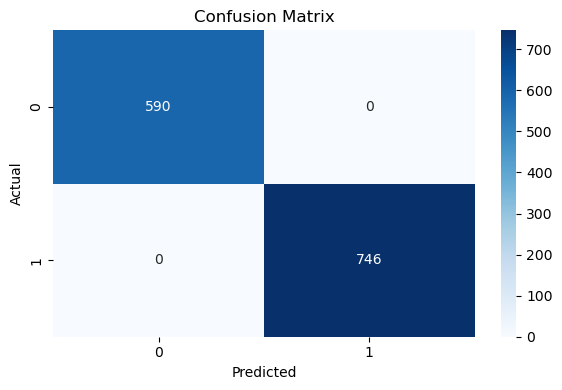

In [26]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()